In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from tensorflow import keras

In [3]:
from sklearn.datasets import load_iris

# EDA

In [4]:
dataset = load_iris()

In [7]:
df = pd.DataFrame(data = dataset.data, columns=dataset.feature_names)

In [8]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
df['target'] = dataset.target

In [11]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [12]:
df.target.value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

In [13]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


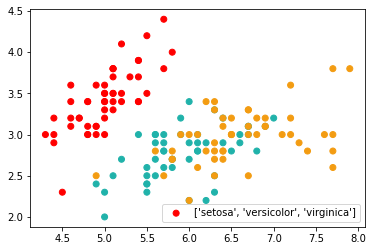

In [14]:
colormap = np.array(['red', 'lightseagreen', '#F39C12'])
plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'], label = ['setosa', 'versicolor', 'virginica'], c=colormap[df.target])
plt.legend()

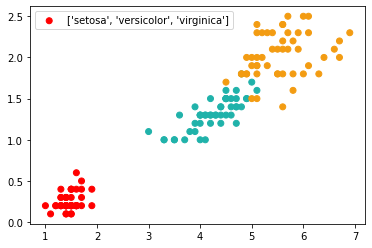

In [15]:
colormap = np.array(['red', 'lightseagreen', '#F39C12'])
plt.scatter(df['petal length (cm)'], df['petal width (cm)'], label = ['setosa', 'versicolor', 'virginica'], c=colormap[df.target])
plt.legend()

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X = df.drop('target', axis = 1)
y = df.target

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [19]:
X_train.shape, y_train.shape

((120, 4), (120,))

# Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
LR = LogisticRegression()

In [22]:
LR.fit(X_train, y_train)

LogisticRegression()

In [23]:
LR.score(X_test, y_test)

0.9666666666666667

# XGBoost Classifier

In [24]:
from xgboost import XGBRFClassifier

In [25]:
xgb = XGBRFClassifier()

In [26]:
xgb.fit(X_train, y_train)

C:\Users\bedoe\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:40:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBRFClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bytree=1, enable_categorical=False, gamma=0,
                gpu_id=-1, importance_type=None, interaction_constraints='',
                max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
                monotone_constraints='()', n_estimators=100, n_jobs=4,
                num_parallel_tree=100, objective='multi:softprob',
                predictor='auto', random_state=0, reg_alpha=0,
                scale_pos_weight=None, tree_method='exact',
                validate_parameters=1, verbosity=None)

In [27]:
xgb.score(X_test, y_test)

0.9666666666666667

# Random Forest Classifier

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
cls = RandomForestClassifier()

In [30]:
cls.fit(X_train, y_train)

RandomForestClassifier()

In [31]:
cls.score(X_test, y_test)

0.9666666666666667

# Artificial Neural Network (ANN)

In [40]:
model = keras.Sequential([
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(500, activation = 'relu'),
    keras.layers.Dense(1000, activation = 'relu'),
    keras.layers.Dense(50, activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid'),
])

model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [41]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
4/4 [==============================] - 1s 8ms/step - loss: 0.0000e+00 - accuracy: 0.3167
Epoch 2/5
4/4 [==============================] - 0s 10ms/step - loss: 0.0000e+00 - accuracy: 0.3583
Epoch 3/5
4/4 [==============================] - 0s 9ms/step - loss: 0.0000e+00 - accuracy: 0.5250
Epoch 4/5
4/4 [==============================] - 0s 9ms/step - loss: 0.0000e+00 - accuracy: 0.6083
Epoch 5/5
4/4 [==============================] - 0s 9ms/step - loss: 0.0000e+00 - accuracy: 0.6333


## We will choose Random Forest Classifier regards to best preformance and accuracy.

In [42]:
import pickle

In [83]:
pickle.dump(cls, open('Model.pkl', 'wb'))

In [76]:
def predicting(model, arr):
    TEMP = pd.DataFrame(data=np.array([arr]),dtype='float64', columns = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)'])
    return model.predict(TEMP.iloc[[0]])

In [82]:
predicting(cls, [1,1,1,1])

array([1])